# Trabalho de conclusão de curso - Data Science com ênfase em Machine Learning
## Alunos: Douglas Tadeu Sabatini & Jari Fernandes Nogueira Neto


### FIB Bauru - 06/2020

### Etapa de treinamento da rede neural dedicada aos caracteres de letras.

In [1]:
# Carregando bibliotecas.
import imutils

import tensorflow as tf
from tensorflow.keras import layers, models

import keras
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout

import cv2
import matplotlib.pyplot as plt
import os

import pandas as pd
import numpy as np
import glob

#os.chdir('/home/jarineto/Documentos/MBA_FIB/TCC')

Using TensorFlow backend.


In [0]:
# Criando lista de treino.

x_treino = []
y_treino = []

# Criando dataframe para análise posterior.

treino = pd.DataFrame ()
treino["IMAGEM"] = ()
treino["ROTULO"] = ()

In [0]:
# Populando a lista x com as imagens e atribuindo o nome de sua respectiva pasta na lista y, que será o rótulo.
# Inserindo também as informações na base final.

imagens = glob.glob ("/content/train_s/*/*.png")
for img in imagens:
    imagem = cv2.imread (img, 0)
    x_treino.append(imagem) # Agregando a imagem na lista x.
    y_treino.append(img[19:20]) # Salvando rótulo na lista y.
    treino.loc[img, 'IMAGEM'] = img[19:] # Incluindo o nome da imagem no df.
    treino.loc[img, 'ROTULO'] = img[19:20] # Incluindo o label da imagem no df (pelo nome da pasta).

x_treino:  (1820, 240, 170)
ROTULO:  B


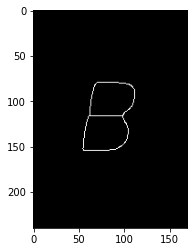

In [0]:
# Verificando se as imagens foram carregadas e exibindo exemplo.

ref = 1

print('x_treino: ', np.array(x_treino).shape) 
plt.imshow(x_treino[ref], cmap = 'gray')
print('ROTULO: ', y_treino[ref])

In [0]:
# Criando dicionário para categorizar numéricamente os rótulos.
dic_cn = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 
       'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 
       'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}

# Criando dicionário para retornar as categorias numéricas para os rótulos reais.
dic_nc = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 
          10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 
          19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}

In [0]:
# Verificando dataframe, removendo o index (está com o caminho da pasta) e exibindo um exemplo.

treino = treino.reset_index(drop=True)
treino['ROTULO_INDEX'] = treino['ROTULO']
treino = treino.replace({'ROTULO_INDEX': dic_cn})

treino

,IMAGEM,ROTULO,ROTULO_INDEX
0,BB_3_1_1-skull.png,B,1
1,B_6_3_1-skull.png,B,1
2,B_4_3_1-skull.png,B,1
3,BB_2_1_1-skull.png,B,1
4,BB_6_2_1-skull.png,B,1
...,...,...,...
1815,M_3_1_1-skull.png,M,12
1816,MB_3_1_1-skull.png,M,12
1817,MB_3_0_1-skull.png,M,12
1818,MB_1_2_1-skull.png,M,12


In [0]:
# Iterando para substituir valores na lista dos rótulos (input da CNN).
lista = len(y_treino)

temp = []
i = 0
    
for i in range(lista):
    y = dic_cn[y_treino[i]]
    temp.append(y)

y_treino = temp

In [0]:
# Criando lista de teste.

x_teste = []
y_teste = []

# Criando dataframe para análise posterior.

teste = pd.DataFrame ()
teste["IMAGEM"] = ()
teste["ROTULO"] = ()

In [0]:
# Populando a lista x com as imagens e atribuindo o nome de sua respectiva pasta na lista y, que será o rótulo.
# Inserindo também as informações na base final.

imagens_teste = glob.glob ("/content/test_s*/*.png")

for imgtest in imagens_teste:
    imagem = cv2.imread (imgtest, 0)
    x_teste.append(imagem) # Agregando a imagem na lista x.
    y_teste.append(imgtest[16:17]) # Salvando rótulo na lista y.
    teste.loc[imgtest, 'IMAGEM'] = imgtest[16:] # Incluindo o nome da imagem no df.
    teste.loc[imgtest, 'ROTULO'] = imgtest[16:17] # Incluindo o label da imagem no df (pelo nome da pasta).

x_teste:  (93, 240, 170)
ROTULO:  F


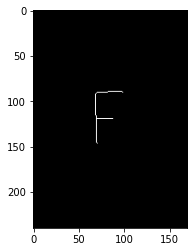

In [0]:
# Verificando se as imagens foram carregadas e exibindo exemplo.

ref = 1

print('x_teste: ', np.array(x_teste).shape) 
plt.imshow(x_teste[ref], cmap = 'gray')
print('ROTULO: ', y_teste[ref])

In [0]:
# Verificando a montagem do dataframe, removendo o index (está com o caminho da pasta) e exibindo um exemplo.

teste = teste.reset_index(drop=True)
teste['ROTULO_INDEX'] = teste['ROTULO']
teste = teste.replace({'ROTULO_INDEX': dic_cn})
teste.head()

,IMAGEM,ROTULO,ROTULO_INDEX
0,F_FMT4659_1_F_skull_.png,F,5
1,F_FNS7995_1_F_skull_.png,F,5
2,L_FHL0898_3_L_skull_.png,L,11
3,F_FXZ3369_1_F_skull_.png,F,5
4,C_DCW0886_2_C_skull_.png,C,2


In [0]:
# Iterando para substituir valores na lista dos rótulos (input da CNN) - Base teste.
lista2 = len(y_teste)

temp = []
i = 0
    
for i in range(lista2):
    y = dic_cn[y_teste[i]]
    temp.append(y)

y_teste = temp

# Criando arquitetura da rede e treinando o modelo.


In [0]:
# Definindo o total de categorias e ajustando os arrays para input na rede.
categorias = 26

y_treino = keras.utils.to_categorical(y_treino, categorias)

x_treino = np.expand_dims(x_treino, -1)
y_treino = np.asarray(y_treino)
y_treino.shape

(1820, 26)

In [0]:
# Repetindo o processo anterior, na base de testes.

y_teste = keras.utils.to_categorical(y_teste, categorias)

x_teste = np.expand_dims(x_teste, -1)
y_teste = np.asarray(y_teste)
y_teste.shape

(93, 26)

In [0]:
## Criando o modelo.
model = keras.Sequential()

# Camada de convolução com ativação relu. 
# 32 filtros com tamanho 30x30
model.add(Conv2D(32, kernel_size=(30, 30),
                 activation = 'relu',
                 input_shape = (240, 170, 1)))


# 32 filtros com tamanho 30x30
model.add(Conv2D(64, (30, 30), activation='relu'))

# Camada de max-pooling, para reduzir o tamanho e capturar melhores features, com tamanho 50x50.
model.add(MaxPooling2D(pool_size=(50, 50)))

# Dropout de 25%, para ajudar no over-fitting.
model.add(Dropout(0.25))

# Camada de flatten, para reduzir as dimensões gerada pelo pooling.
model.add(Flatten())


# Camada fully connected.
model.add(Dense(128, activation='relu'))

# Dropout de 50% por segurança.
model.add(Dropout(0.5))

# Camada softmax para categorizar o resultado.
model.add(Dense(26, activation='softmax')) # 26 categorias.


In [0]:
# Compilando o modelo.

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [4]:
# Exibindo o resumo de nossa CNN.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 211, 141, 32)      28832     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 182, 112, 64)      1843264   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 2, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               49280     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
# Definindo o número de épocas.
## OBS: Utilizaremos 100% das amostras de treinamento, para validação: Batch Gradient Descent.

num_epoch = 100 

# Treinamento da rede.
model_log = model.fit(x_treino, y_treino,
          epochs=num_epoch,
          verbose=1,
          validation_data=(x_teste, y_teste))

Train on 1820 samples, validate on 93 samples
Epoch 1/100
1820/1820 [==============================] - 15s 8ms/step - loss: 6.8057 - accuracy: 0.1176 - val_loss: 2.1078 - val_accuracy: 0.5161
Epoch 2/100
1820/1820 [==============================] - 15s 8ms/step - loss: 2.3614 - accuracy: 0.2874 - val_loss: 1.1120 - val_accuracy: 0.7527
Epoch 3/100
1820/1820 [==============================] - 15s 8ms/step - loss: 1.6973 - accuracy: 0.4786 - val_loss: 0.8238 - val_accuracy: 0.7849
Epoch 4/100
1820/1820 [==============================] - 15s 8ms/step - loss: 1.4190 - accuracy: 0.5659 - val_loss: 0.5779 - val_accuracy: 0.7634
Epoch 5/100
1820/1820 [==============================] - 15s 8ms/step - loss: 1.0232 - accuracy: 0.6857 - val_loss: 0.3594 - val_accuracy: 0.9140
Epoch 6/100
1820/1820 [==============================] - 15s 8ms/step - loss: 1.0117 - accuracy: 0.7181 - val_loss: 0.4365 - val_accuracy: 0.8065
Epoch 7/100
1820/1820 [==============================] - 15s 8ms/step - loss: 

KeyboardInterrupt: ignored

## Aplicando modelo na base de testes.

In [0]:
# Aplicando Score na base de testes e exibindo a acurácia e loss.
score = model.evaluate(x_teste, y_teste, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.002968761559215284
Test accuracy: 1.0


In [0]:
# Adicionando resultado e criando coluna para filtro de erros.
y_prob = model.predict(x_teste) 
y_classes = y_prob.argmax(axis=-1)

teste['PREDICT_INDEX'] = y_classes

In [0]:
# Em caso de erros, filtrando e exibindo os caracteres específicos.
teste['PREDICT'] = teste['PREDICT_INDEX']
teste = teste.replace({'PREDICT': dic_nc})
teste = teste.drop(['ROTULO_INDEX', 'PREDICT_INDEX'], axis = 1)

teste['ERROR'] = np.where((teste['ROTULO'] == teste['PREDICT']) , 0, 1)

teste = teste.sort_values('IMAGEM')
teste[teste.ERROR == 1]

,IMAGEM,ROTULO,PREDICT,ERROR


# Gravando e carregando modelo treinado.

In [0]:
# Salvando o modelo treinado.

# Criando Json com o modelo.
model_json = model.to_json()
with open("/content/model_char_100-1.json", "w") as json_file:
    json_file.write(model_json)
    
# Gravando pesos do modelo em HDF5 - Hierarchical Data Format.
model.save_weights("/content/model_char_100-1.h5")
print("Modelo gravado na pasta de códigos.")

Modelo gravado na pasta de códigos.


In [0]:
# Carrega o arquivo JSON e re-cria o modelo.
json_file = open('./Modelos/model_char_01.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# Carrega os pesos e adiciona ao modelo.
model.load_weights("./Modelos/model_char_01.h5")
print("Modelo carregado.")
 
# Avalia o modelo carregado na base de testes.
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = model.evaluate(x_teste, y_teste, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Modelo carregado.
accuracy: 100.00%


## Plotando resultados.

Text(0.5, 0, 'epoch')

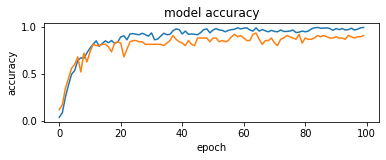

In [0]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')



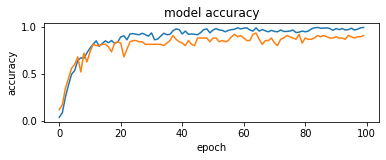

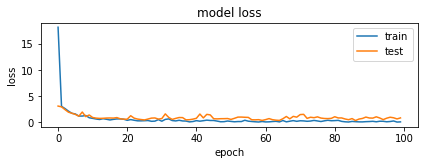

In [0]:
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig